In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Churn_Modelling.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df['Tenure'].value_counts().values

array([1048, 1035, 1028, 1025, 1012, 1009,  989,  984,  967,  490,  413])

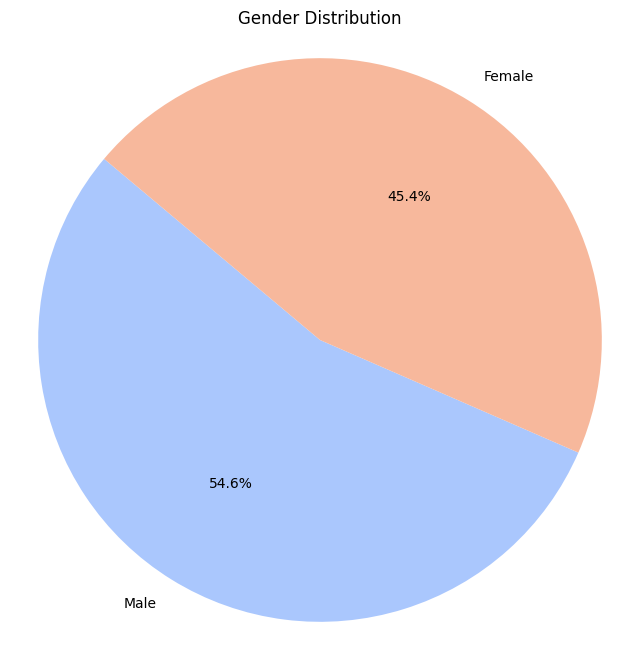

In [15]:
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

colors = sns.color_palette('coolwarm', len(labels))

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

<ipython-input-13-87054a1b6fb4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Geography', palette='Set2')


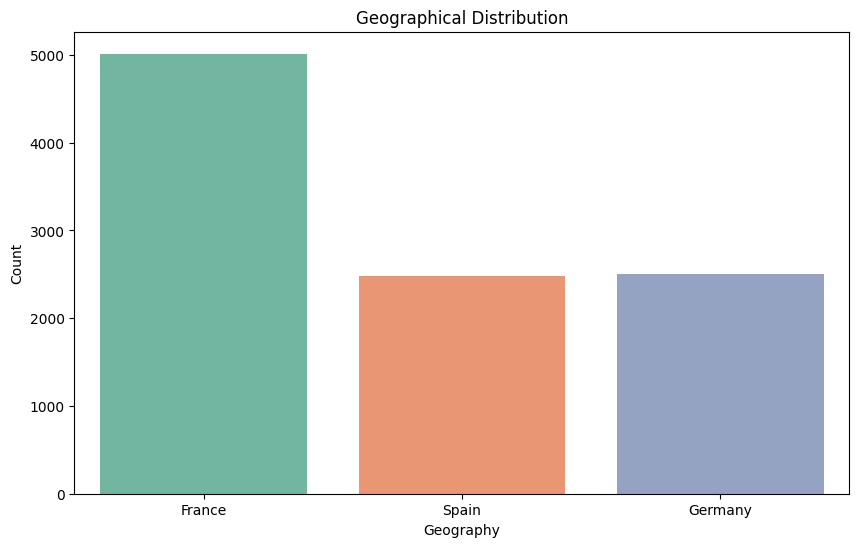

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Geography', palette='Set2')
plt.title('Geographical Distribution')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

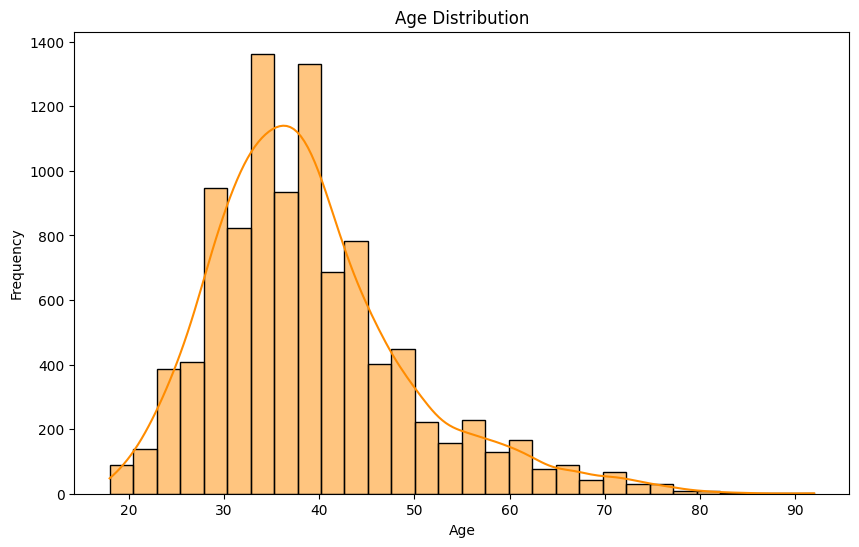

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data = df,x="Age",kde = True,bins = 30,color = "darkorange")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

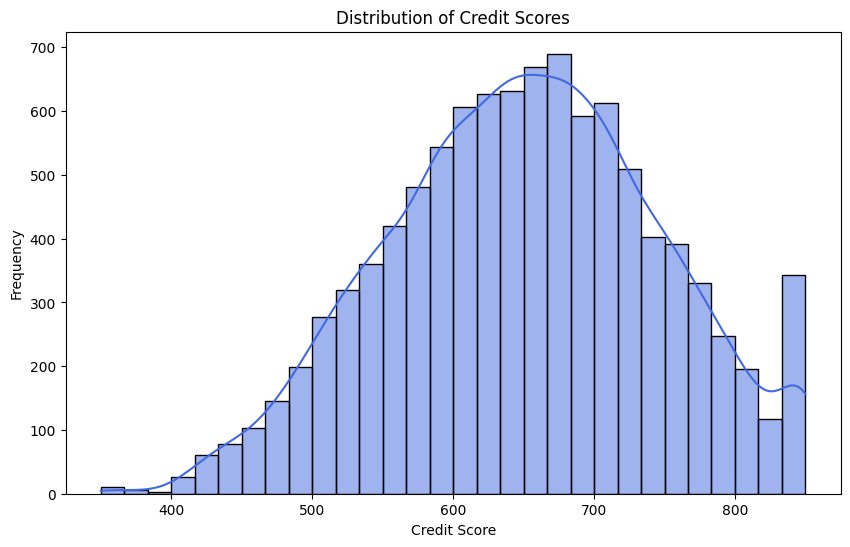

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

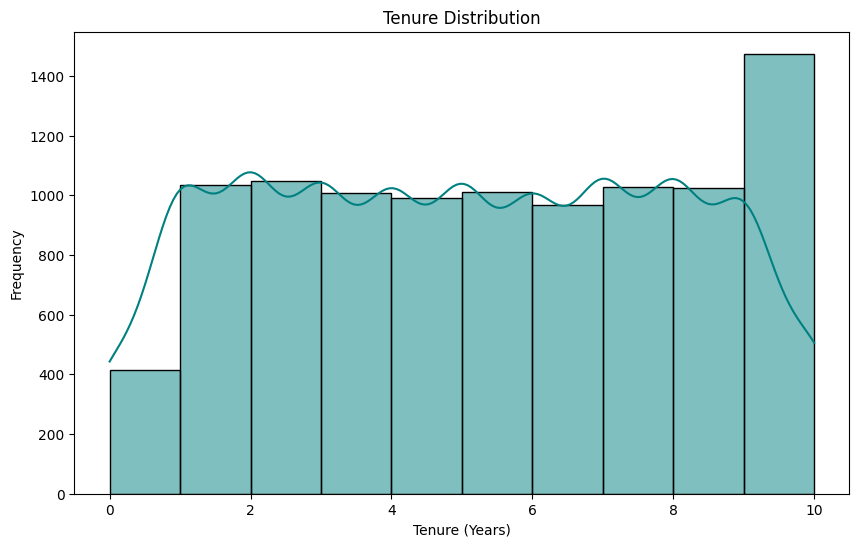

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'], bins=10, kde=True, color='teal')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-18-55a1136a5b5a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Exited', palette='Set3')


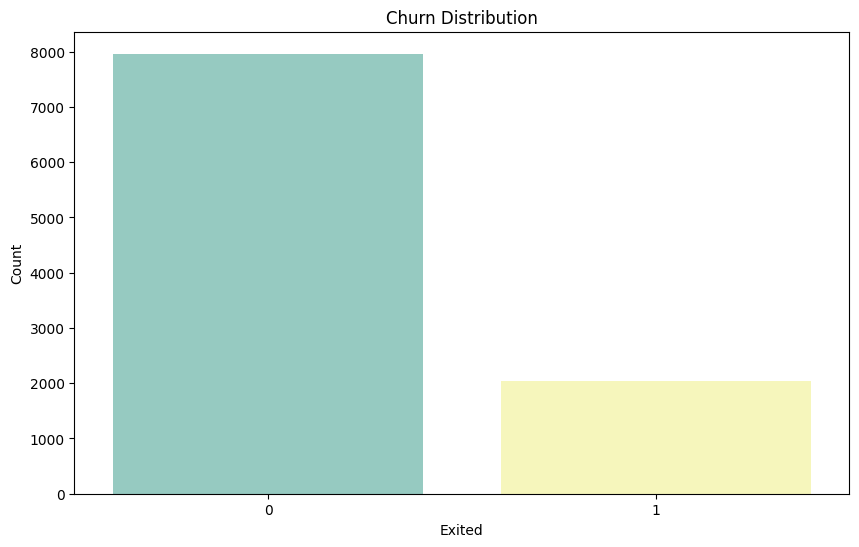

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Exited', palette='Set3')
plt.title('Churn Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

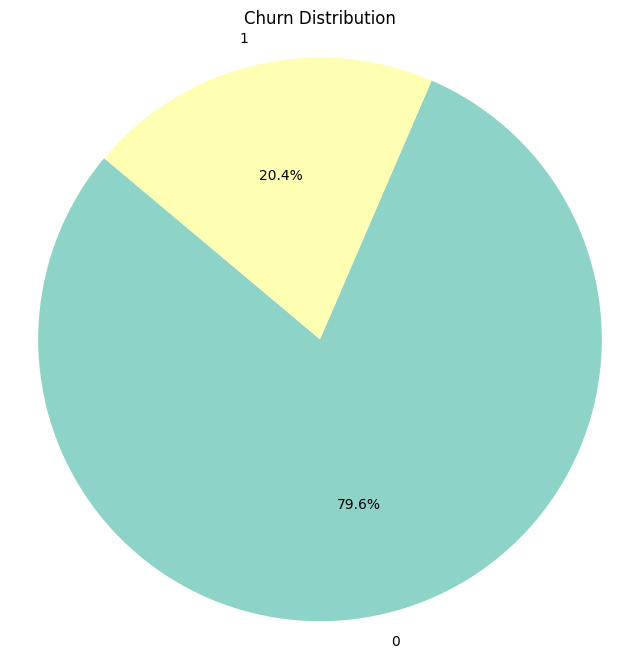

In [19]:
churn_counts = df['Exited'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

colors = sns.color_palette('Set3', len(labels))

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [22]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_cols = x.select_dtypes(include=['object']).columns

# Create a transformer for numerical and categorical data
transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the transformer to the DataFrame
x = transformer.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
lr_y_pred = lr_model.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_y_pred)*100)
print(classification_report(y_test, lr_y_pred))

Logistic Regression Accuracy: 81.0
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.54      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.77      0.81      0.77      2000



In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred)*100)
print(classification_report(y_test, rf_y_pred))


Random Forest Accuracy: 85.55
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1607
           1       0.85      0.32      0.47       393

    accuracy                           0.86      2000
   macro avg       0.85      0.65      0.69      2000
weighted avg       0.85      0.86      0.83      2000



In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train, y_train)
gb_y_pred = gb_model.predict(x_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_y_pred)*100)
print(classification_report(y_test, gb_y_pred))

Gradient Boosting Accuracy: 86.4
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



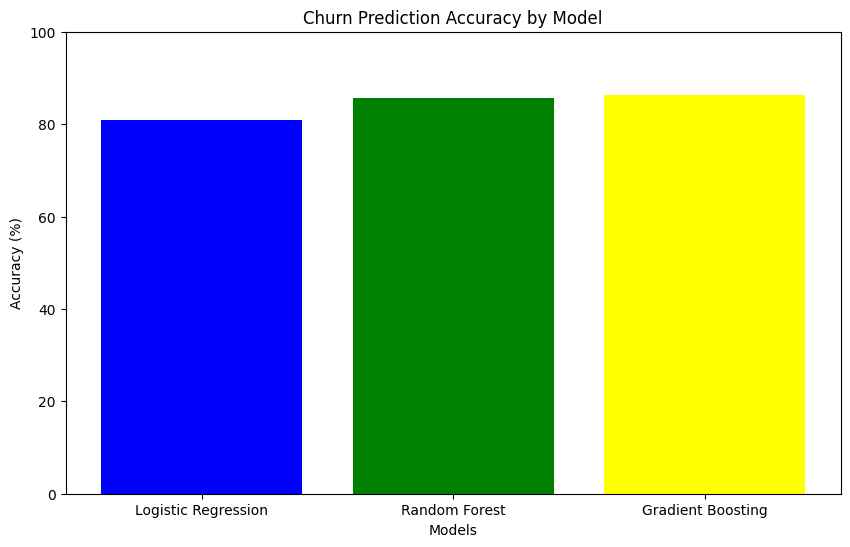

In [36]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [accuracy_score(y_test, lr_y_pred) * 100, accuracy_score(y_test, rf_y_pred) * 100, accuracy_score(y_test, gb_y_pred) * 100]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'green', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Churn Prediction Accuracy by Model')
plt.ylim(0, 100)
plt.show()
